# <center>  HAPPY-SAD MODEL CLASSIFIER </center>
#Todo: Create a model that Classfier Happy and Sad People
+ BUILDING A DATA PIPELINE
+ PREPROCESSING IMAGES FOR DL
+ CREATING A DEEP NN CLASSIFIER
+ EVALUATING MODEL PERFORMANCE
+ SAVING THE MODEL FOR DEPLOYMENT

## 1. Install Dependencies and Setup

In [ ]:
# pip install numpy --upgrade
# !pip list

In [1]:
import tensorflow as tf
import os

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus: 
#    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
tf.config.list_physical_devices('GPU')

[]

### 1.2. Remove dodgy images

In [2]:
import cv2
import imghdr # Use to check for the image type
import PIL.Image as Image
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
os.listdir('data'), os.path.join('data', 'happy' )

(['.ipynb_checkpoints',
  'happy',
  'images.jpg',
  'images2.jpg',
  'images3.jpeg',
  'sad'],
 'data\\happy')

In [7]:
for image_class in os.listdir(data_dir): 
    print(image_class)

.ipynb_checkpoints
happy
images.jpg
images2.jpg
images3.jpeg
sad


In [8]:
# To get every image in the folrder

os.listdir(os.path.join(data_dir, 'sad' ))
# This return all photos in the happy folder

['-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg',
 '1000_F_124527256_XeXO1Q7xiE39ZcnuCOHTCotlj7p1FYwc.jpg',
 '1000_F_233515059_A3JEmjWEgLcwOAc7aNxa6k3SDXjvvBgv.jpg',
 '12165734.jpg',
 '141203-depression-stock.jpg',
 '360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo.jpg',
 '360_F_573380015_l5YdjSZuJqET7UWOHBVMhzT7J63O8hPq.jpg',
 '360_F_601507482_RbV0Vk2KSg72LkjkSZBJNpmxu6Y4Hdzw.jpg',
 '39843138-sad-man.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg',
 '8iAb9k4aT.jpg',
 '960x0.jpg',
 'b2ap3_large_happy-sad-unsplash-850x575.jpg',
 'crying-at-work.jpg',
 'DealingwithDepressionwithoutMedication-1.jpg',
 'depressed-man.jpg',
 'depressed-person-standing-alone-bench_23-2150761438.jpg',
 'depression-1020x680.jpg',
 'depression-sad-mood-sorrow-dark-people-wallpaper-7.jpg',
 'Depression-Vs-Sadness-Are-You-Just-Sad-Or-Depressed-2020-960x640.jpg',
 'dreamstime_m_169987253.jpg',
 'dreamstime_s_10

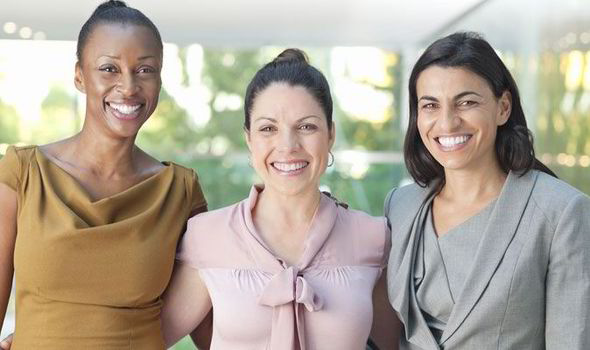

In [9]:
Image.open(os.path.join(data_dir, 'happy', '1-2.jpg'))

In [10]:
img = cv2.imread(os.path.join(data_dir, 'happy', '1-2.jpg'))
img.shape

(350, 590, 3)

In [11]:
type(img)

numpy.ndarray

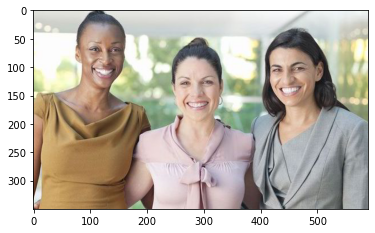

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
os.path.join(data_dir, image_class)
os.listdir(data_dir)
#os.path.join(data_dir, image_class)

#for image_class in os.listdir(data_dir): 
 #   print(image_class)
    #else:
     #   print(os.listdir(data_dir))

['.ipynb_checkpoints',
 'happy',
 'images.jpg',
 'images2.jpg',
 'images3.jpeg',
 'sad']

In [23]:
for image_class in os.listdir(data_dir): 
    if '.jp' in image_class:
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\German-Shepherd.webp


### 1.3. Load Data

In [24]:
# tf.data.Dataset??
import numpy as np

In [25]:
# Use to load the data and group them into batch
tf.keras.utils.image_dataset_from_directory(data_dir)     # Abt

Found 163 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
# It resize, batch 
data =tf.keras.utils.image_dataset_from_directory(data_dir)
# this return a generator, it have to be iterate to get the data

Found 163 files belonging to 2 classes.


In [17]:
len(data)

6

In [20]:
for i in data:
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[180.60938   , 145.92188   ,  17.390625  ],
         [149.125     , 109.578125  ,   0.        ],
         [146.98438   , 100.828125  ,   0.        ],
         ...,
         [121.71875   ,  96.4375    ,  28.328125  ],
         [128.23438   ,  98.8125    ,   7.15625   ],
         [151.90625   , 120.734375  ,   6.96875   ]],

        [[182.07727   , 146.19287   ,  18.587524  ],
         [153.81097   , 113.89148   ,   1.6767883 ],
         [152.56238   , 105.68347   ,   3.8729858 ],
         ...,
         [114.33411   ,  89.36337   ,  22.12909   ],
         [122.266815  ,  93.369995  ,   4.5704956 ],
         [147.3219    , 116.63556   ,   4.7499695 ]],

        [[184.41003   , 146.62354   ,  20.489624  ],
         [161.25787   , 120.746216  ,   4.341522  ],
         [161.42688   , 113.399536  ,  10.027893  ],
         ...,
         [102.59851   ,  78.12125   ,  12.277649  ],
         [112.78323   ,  84.720825  ,   0.4612

In [28]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [29]:
# Get batch of data(Image)
batch = data_iterator.next()

In [30]:
len(batch)  
# 1st is for image and 
# 2nd is for the label(folder)

2

In [31]:
# Images represented as numpy array
batch[0].shape

(32, 256, 256, 3)

In [32]:
# Label representation
#Class 1 = SAD People
#Class 2 = HAPPY People
batch[1]

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

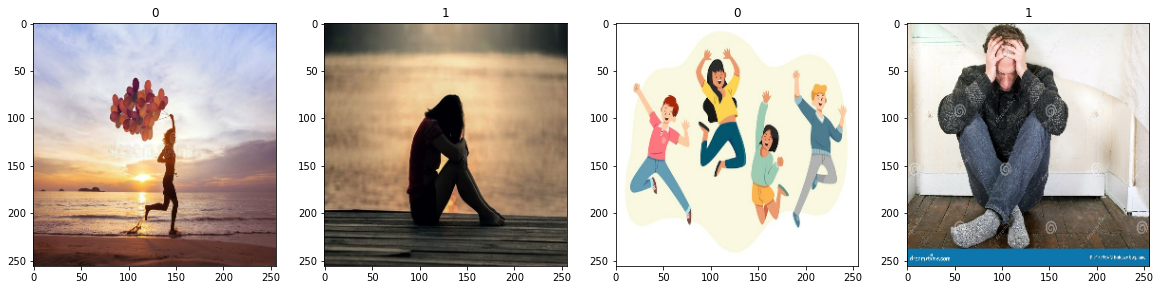

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess Data

### 2.1. Scale Data

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()[0].max()

1.0

In [11]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### 2.2 Split Data

In [12]:
len(data)

6

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [14]:
(test_size, val_size, train_size), (test_size + val_size + train_size)

((1, 1, 4), 6)

In [15]:
# Use TAKE AND SKIP
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 3.Deep Model

### 3.1 Build Deep Learning Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [41]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1, 1), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu', ))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu', ))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2 Train

In [44]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 13s 3s/step - loss: 1.6252 - accuracy: 0.4219 - val_loss: 0.6481 - val_accuracy: 0.6562
Epoch 2/20
4/4 [==============================] - 11s 2s/step - loss: 0.7273 - accuracy: 0.5625 - val_loss: 0.6630 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 12s 2s/step - loss: 0.6410 - accuracy: 0.5781 - val_loss: 0.5843 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 10s 2s/step - loss: 0.5686 - accuracy: 0.6484 - val_loss: 0.5162 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 10s 2s/step - loss: 0.5530 - accuracy: 0.6719 - val_loss: 0.5438 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 10s 2s/step - loss: 0.4678 - accuracy: 0.8516 - val_loss: 0.6051 - val_accuracy: 0.5625
Epoch 7/20
4/4 [==============================] - 10s 2s/step - loss: 0.4448 - accuracy: 0.7578 - val_loss: 0.3890 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

### 3.3 Plot Performance

In [46]:
import pandas as pd
loss = pd.DataFrame(hist.history)
loss

loss  accuracy  val_loss  val_accuracy
0   1.625167  0.421875  0.648059       0.65625
1   0.727327  0.562500  0.662971       0.56250
2   0.640980  0.578125  0.584350       0.71875
3   0.568602  0.648438  0.516174       0.68750
4   0.552982  0.671875  0.543800       0.78125
5   0.467761  0.851562  0.605093       0.56250
6   0.444844  0.757812  0.389038       0.87500
7   0.414182  0.875000  0.493109       0.84375
8   0.381802  0.875000  0.374737       0.87500
9   0.307299  0.890625  0.270759       0.90625
10  0.251746  0.906250  0.266199       0.87500
11  0.264880  0.867188  0.240211       0.93750
12  0.245460  0.937500  0.114764       0.96875
13  0.178501  0.945312  0.118084       1.00000
14  0.148477  0.960938  0.089230       1.00000
15  0.086906  0.976562  0.034136       1.00000
16  0.069032  0.976562  0.032262       1.00000
17  0.039559  0.992188  0.027544       1.00000
18  0.029919  1.000000  0.018945       1.00000
19  0.030415  1.000000  0.057231       1.00000

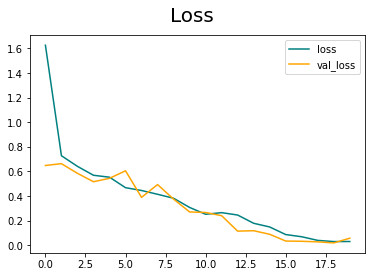

In [47]:
fig = plt.figure()
plt.plot(loss['loss'], color='teal', label='loss')
plt.plot(loss['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

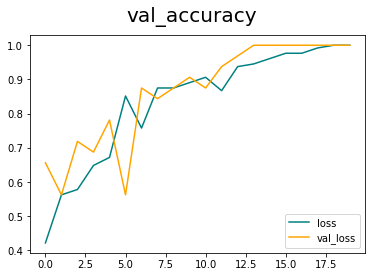

In [48]:
fig = plt.figure()
plt.plot(loss['accuracy'], color='teal', label='loss')
plt.plot(loss['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('val_accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [51]:
len(test)

1

In [52]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    print("passed")

1/1 [==============================] - 0s 287ms/step
passed


In [53]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result()}, Accuracy:{acc.result()}")

Precision:1.0, Recall:1.0, Accuracy:1.0


### 4.2 Test

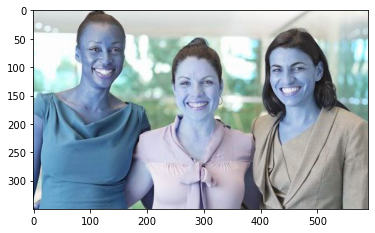

In [54]:
img = cv2.imread((os.path.join(data_dir, 'happy','1-2.jpg')))
plt.imshow(img)
plt.show()
#img = cv2.imread(os.path.join(data_dir, 'happy','1-2.jpg'))
#Image.open(os.path.join(data_dir, 'happy','1-2.jpg'))

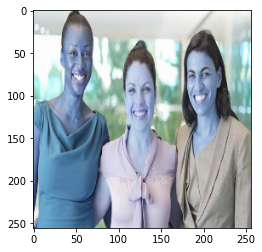

In [56]:
resize_image1 = tf.image.resize(img, (256,256))
plt.imshow(resize_image1.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize_image1/255, 0))

1/1 [==============================] - 0s 50ms/step


In [58]:
yhat

array([[0.9566277]], dtype=float32)

In [59]:
def res(res):
    if res > 0.5: 
        print(f'Predicted class is Sad')
    else:
        print(f'Predicted class is Happy')

In [60]:
res(yhat), yhat

Predicted class is Sad


(None, array([[0.9566277]], dtype=float32))

In [61]:
data_dir

'data'

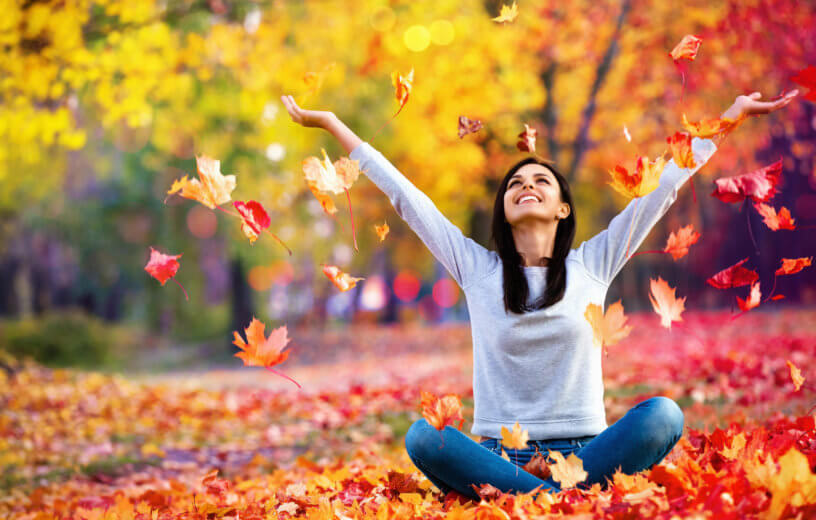

In [62]:
Image.open(os.path.join(data_dir, 'images3.jpeg'))

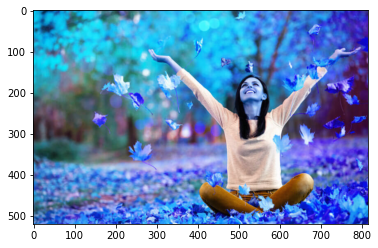

1/1 [==============================] - 0s 51ms/step


In [63]:
#Image.open(os.path.join(data_dir, 'happy','1-2.jpg'))
img2 = cv2.imread(os.path.join(data_dir, 'images3.jpeg'))
resize_image2 = tf.image.resize(img2, (256,256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

plt.imshow(img2)
plt.show()
yhatt = model.predict(np.expand_dims(resize_image2/255, 0))

In [64]:
res(yhatt), yhatt

Predicted class is Happy


(None, array([[0.39176235]], dtype=float32))

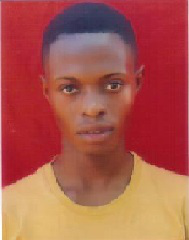

In [66]:
Image.open(os.path.join(data_dir, 'images2.jpg'))

In [67]:
img3 = cv2.imread(os.path.join(data_dir, 'images2.jpg'))
resize_image3 = tf.image.resize(img3, (256,256))
pred_img3 = model.predict(np.expand_dims(resize_image3/255, 0))

1/1 [==============================] - 0s 65ms/step


In [68]:
res(pred_img3), pred_img3

Predicted class is Sad


(None, array([[0.9974392]], dtype=float32))

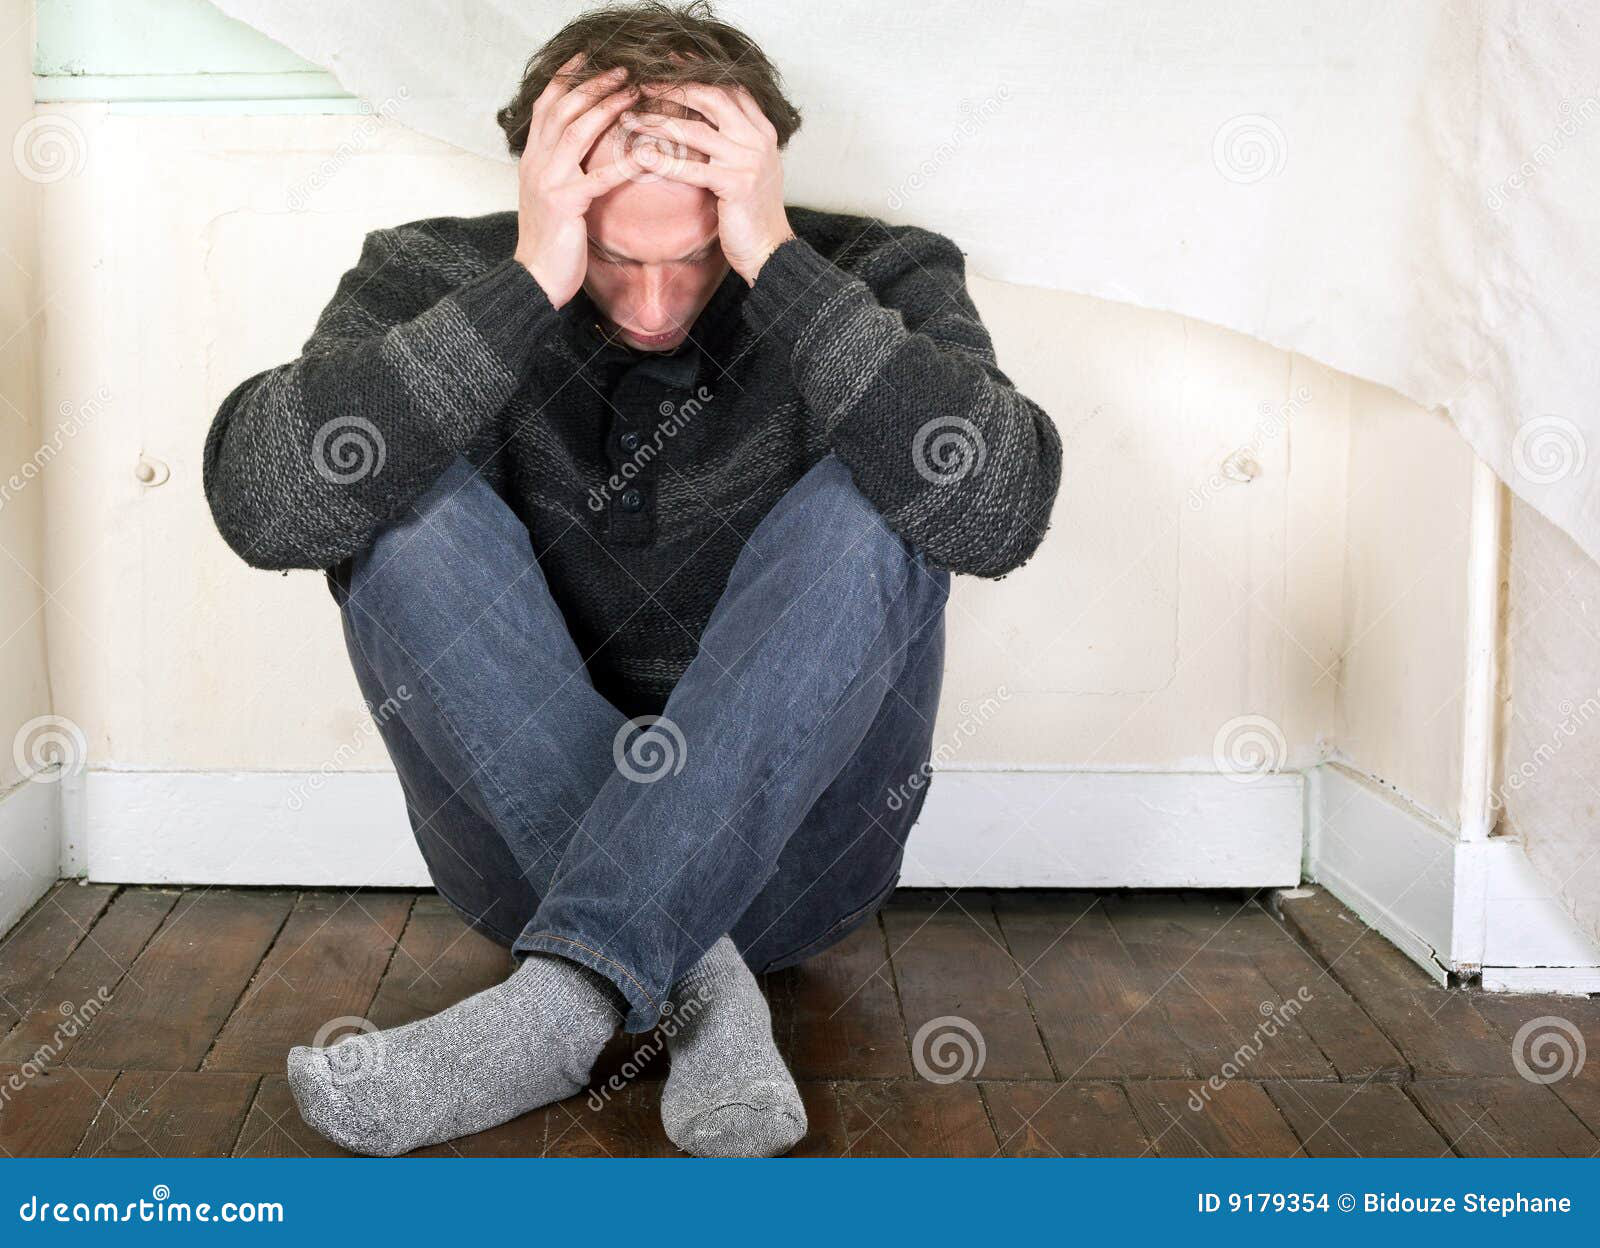

In [69]:
Image.open(os.path.join(data_dir, 'sad', 'very-sad-man-depression-9179354.jpg' ))

In [70]:
img4 = cv2.imread(os.path.join(data_dir, 'sad', 'very-sad-man-depression-9179354.jpg' ))

resize_image4 = tf.image.resize(img4, (256,256))
pred_img4 = model.predict(np.expand_dims(resize_image4/255, 0))
pred_img4

1/1 [==============================] - 0s 71ms/step


array([[0.9974362]], dtype=float32)

In [71]:
res(pred_img4), pred_img4

Predicted class is Sad


(None, array([[0.9974362]], dtype=float32))

## 5 Save the Model

### 5.1 Save the Model

In [73]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [74]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [76]:
new_model.predict(np.expand_dims(resize_image4/255, 0))
new_model

1/1 [==============================] - 0s 143ms/step


In [77]:
new_model